In [1]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sn

druguser = pa.read_csv("drug_consumption.csv", names = ['ID',
'Age',
'Gender',
'Education',
'Country',
'Ethnicity',
'Nscore',
'Escore',
'Oscore',
'Ascore',
'Cscore',
'Impulsive',
'SS',
'Alcohol',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Cannabis',
'Choc',
'Coke',
'Crack',
'Ecstasy',
'Heroin',
'Ketamine',
'Legalh',
'LSD',
'Meth',
'Mushrooms',
'Nicotine',
'Semer',
'VSA'])

druguser.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


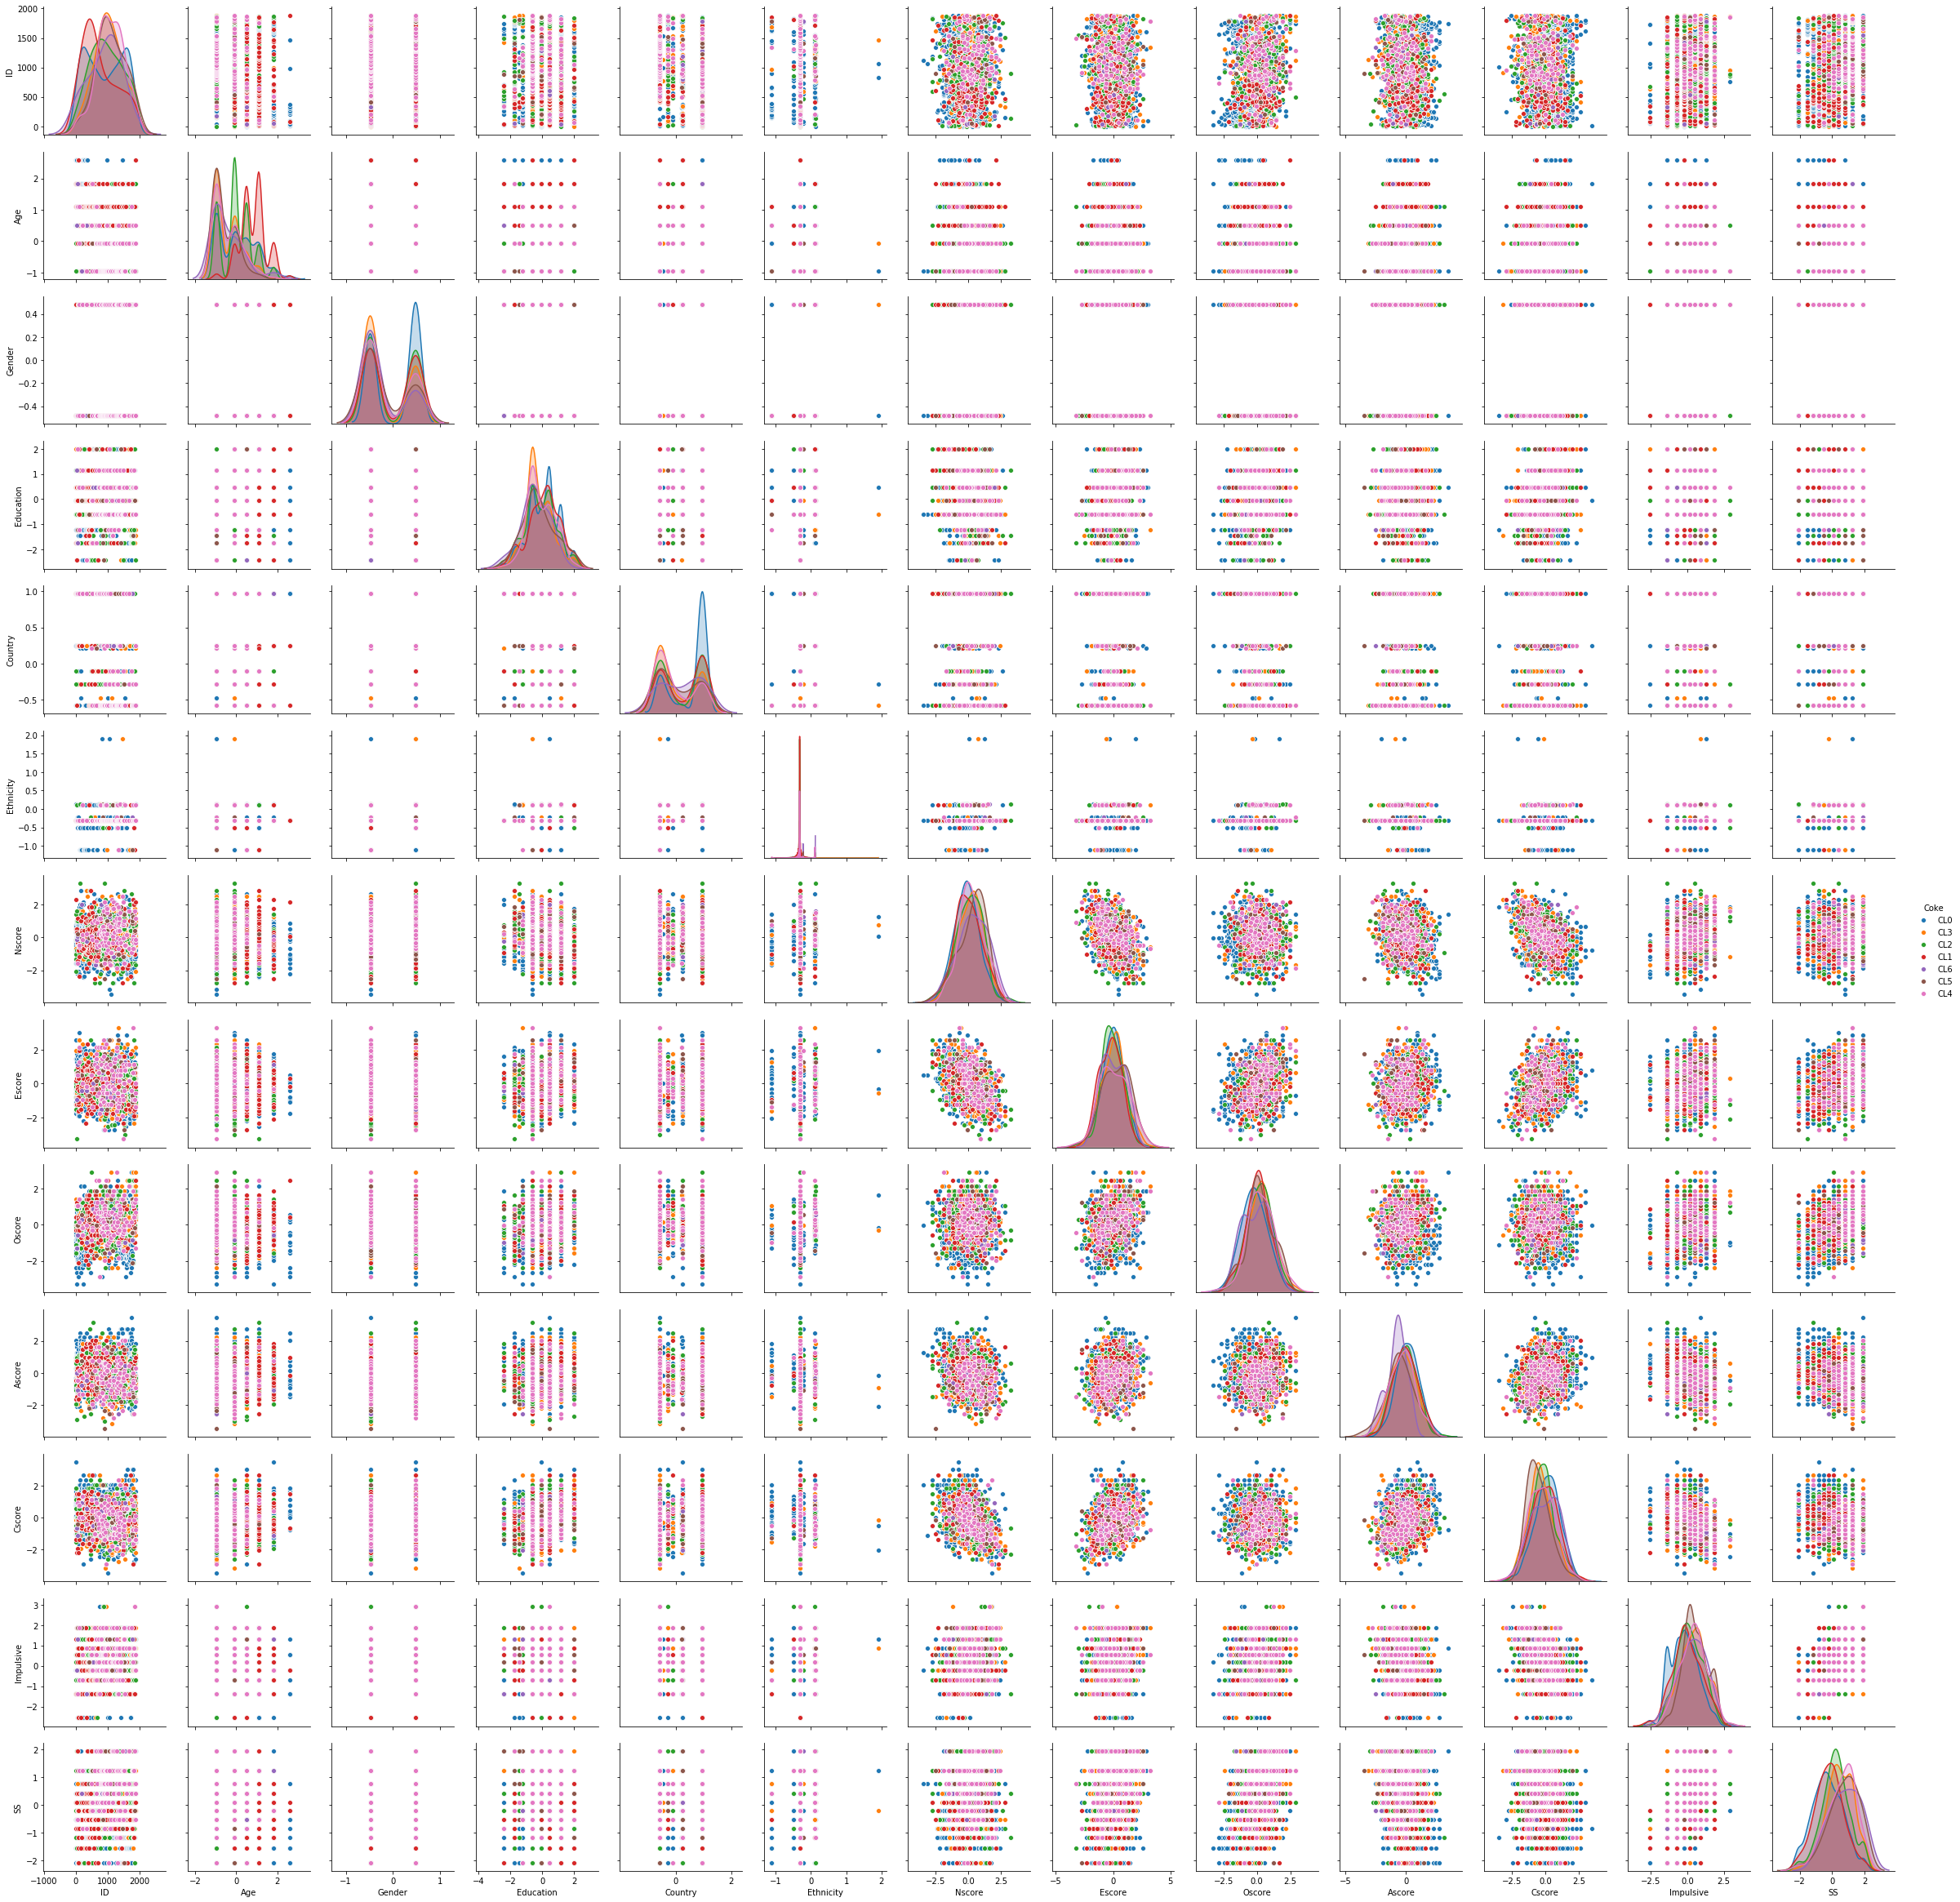

In [6]:
sn.pairplot(druguser, hue = "Coke")

In [5]:
set(druguser.Coke)

{'CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'}

//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


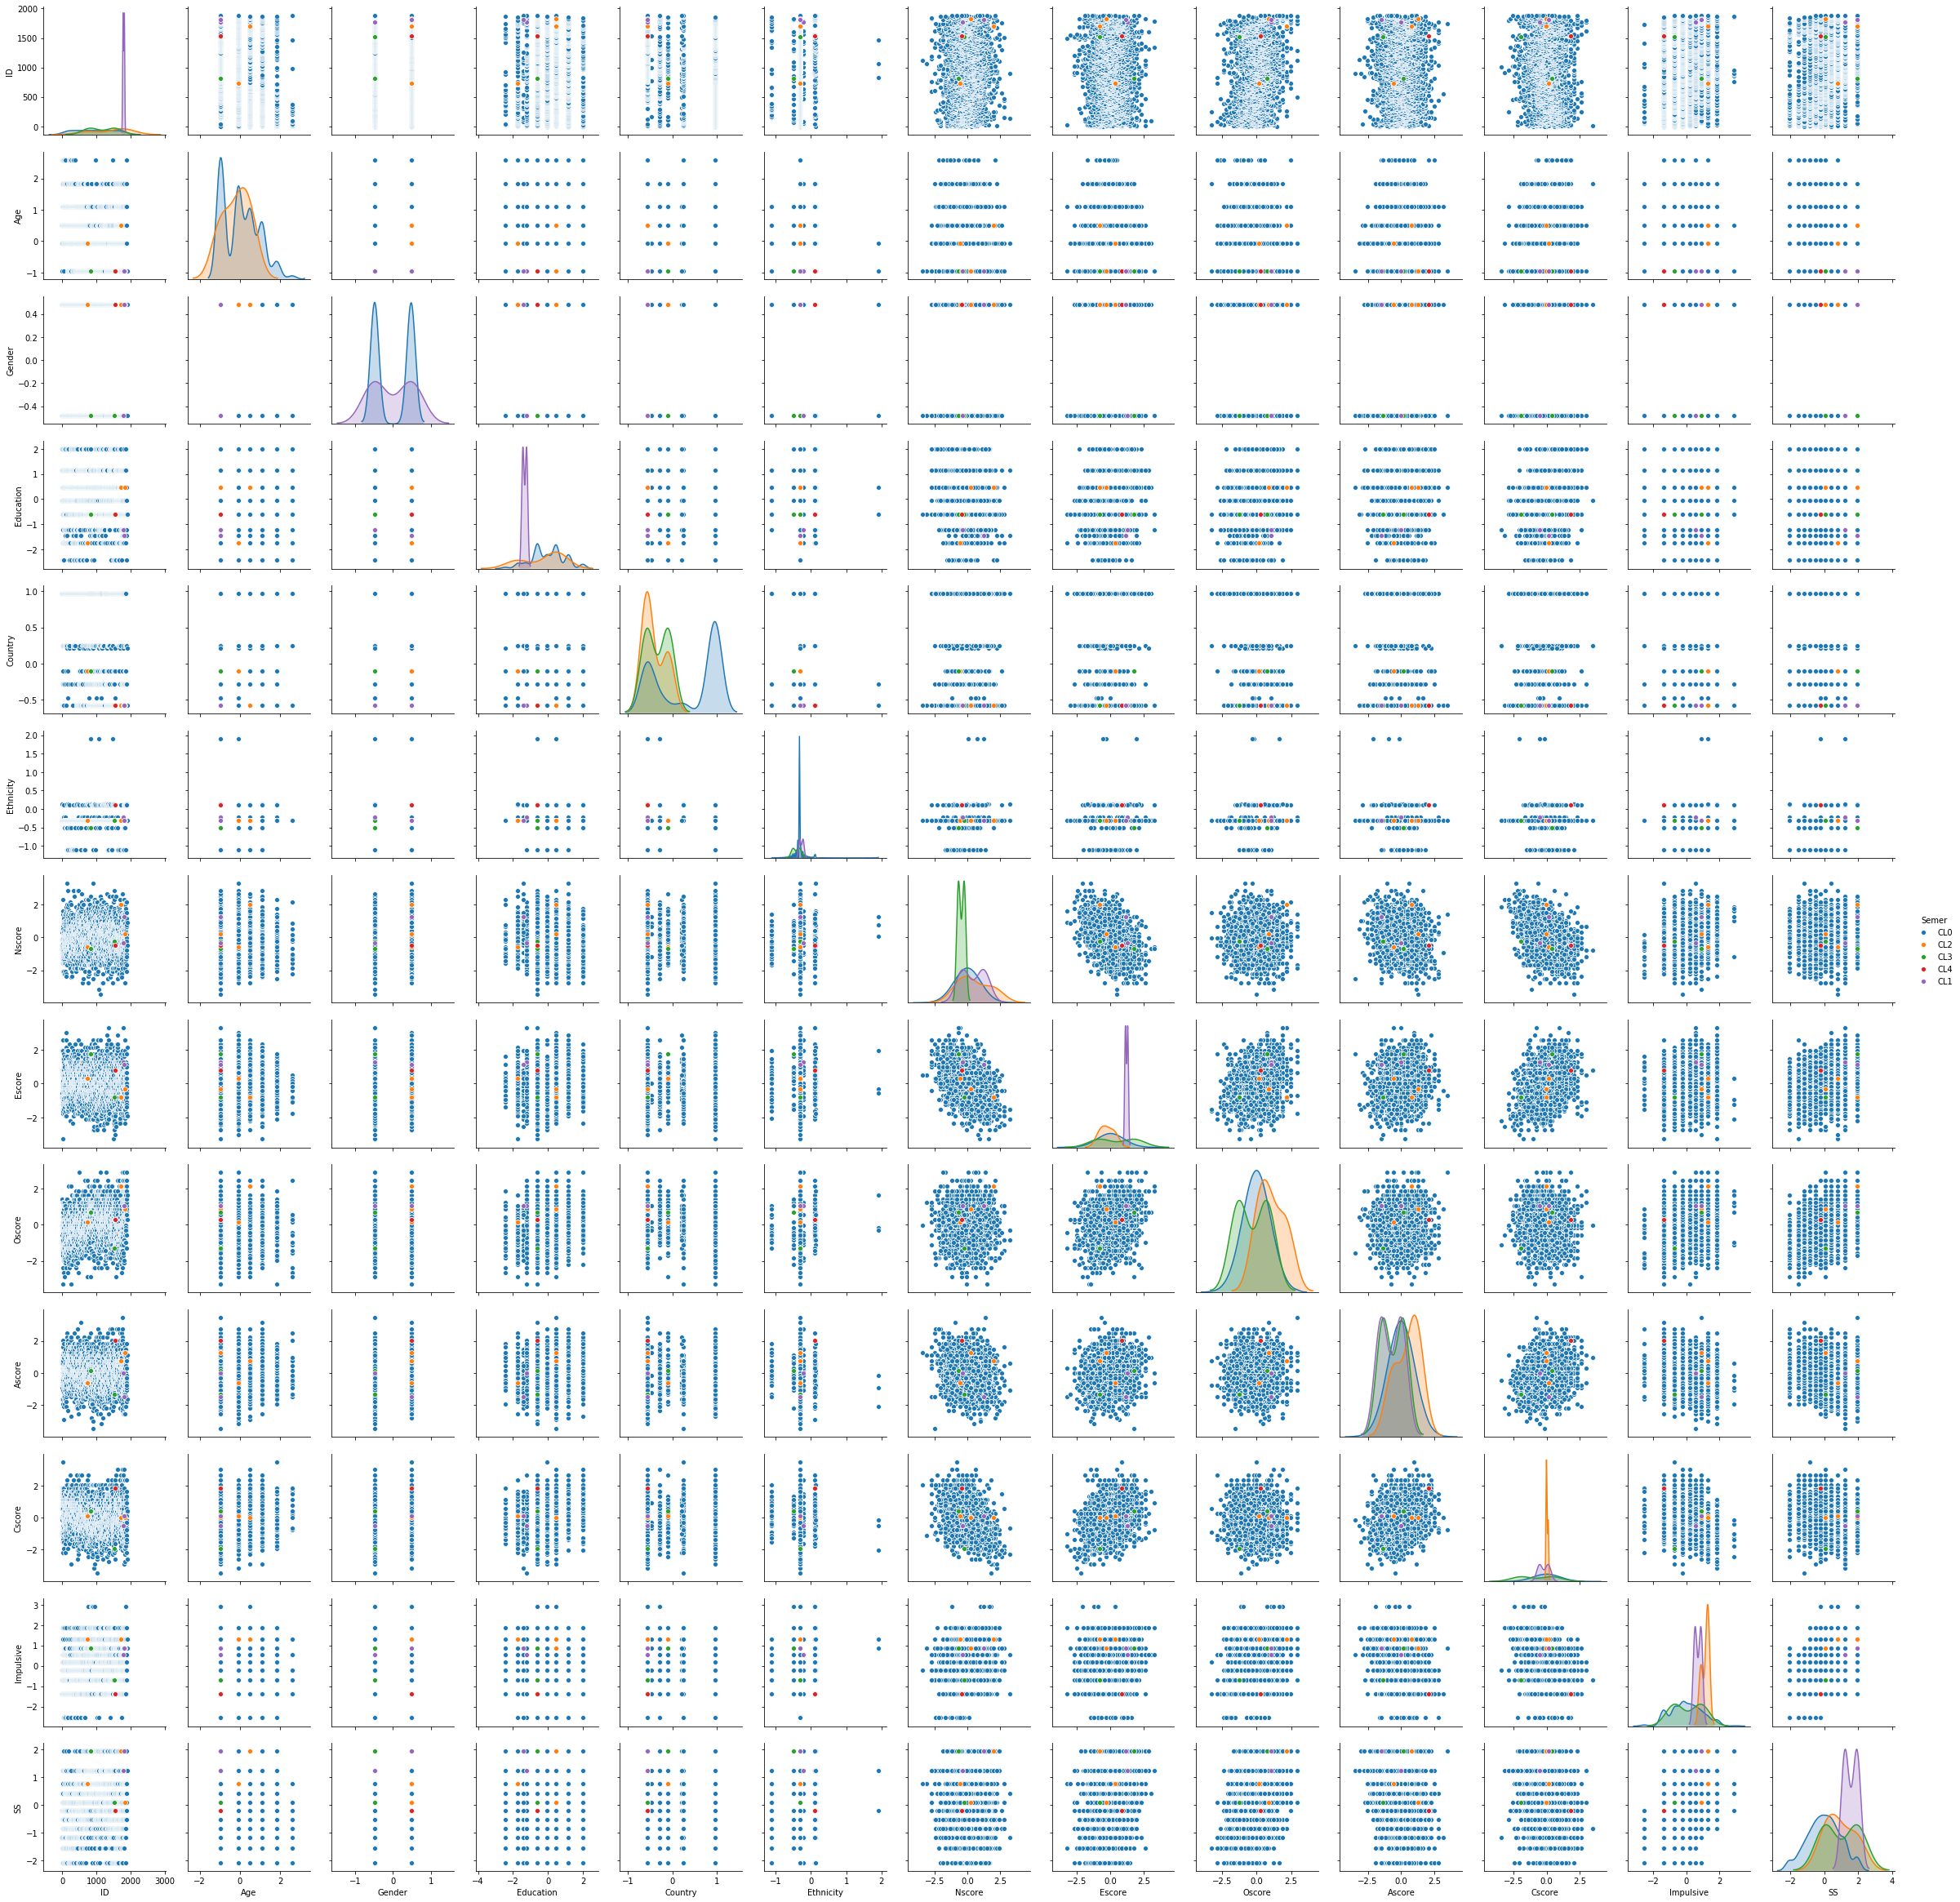

In [2]:
sn.pairplot(druguser, hue = "Semer")

In [2]:
names = {'CL0':0,'CL1':0,'CL2':0,'CL3':0,'CL4':0,'CL5':1,'CL6':1,0:0, 1:1}
druguser.Coke = druguser.Coke.map(names)
druguser.Coke.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Coke, dtype: int64

In [3]:
X = np.array(druguser[['Cscore','Escore']])
y = np.array(druguser['Coke'])

In [4]:
import numpy.random as rn

In [5]:
n = X.shape[0]
test = int(0.20*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       
y_test = y[:test]
X_train = X[test:]     
y_train = y[test:]

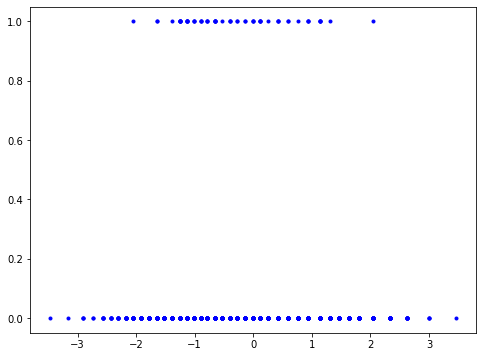

In [6]:
plt.figure(figsize = (8, 6))
plt.plot(X[:,0], y, 'b.');

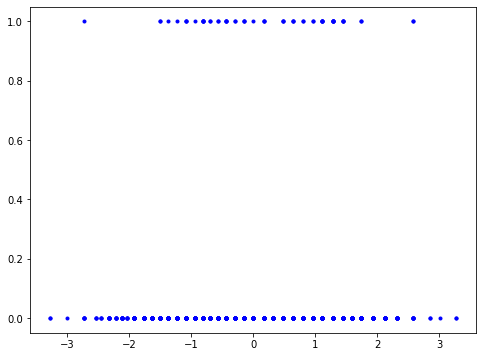

In [7]:
plt.figure(figsize = (8, 6))
plt.plot(X[:,1], y, 'b.');

In [8]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression(solver='lbfgs')
lgreg.fit(X_train[:,1].reshape(-1,1), y_train);

In [9]:
b, m = *lgreg.intercept_, *lgreg.coef_[0]
b, m

(-3.428197679433245, 0.1555271083413935)

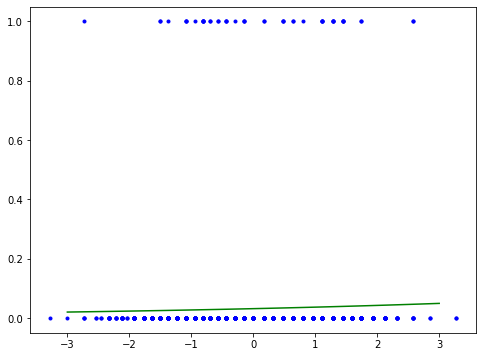

In [10]:
plt.figure(figsize = (8, 6))
plt.plot(X_train[:,1], y_train, 'b.')
xx = np.linspace(-3, 3, 100)
yy = np.exp(m*xx+b)/(1 + np.exp(m*xx+b))
plt.plot(xx, yy, 'g-');

In [11]:
lgreg.score(X_train[:,1].reshape(-1,1),y_train)

0.9681697612732095

In [12]:
lgreg.score(X_test[:,1].reshape(-1,1),y_test)

0.9681697612732095

# Homework 2 Explanation 
 To produce the results above, I looked at the pairplot with respect to the drug cocaine ("Coke") and tried to
 find attributes that may have some sort of corrolation. While there is no apparantly evident corrolation between
 any of the attributes, there seemed to be a very slight relationship between cscore (contentiousness) and nscorer
 (neuroticism). So, I made 2 plots: cscore vs. user/non-user of cocaine and nscore vs. user/non-user of cocaine 
 (note: for purposes of these graphs, I classified a "user" as anyone who has used cocaine within the last week.)
 Then, I attempted to use linear regression to find a decision boundary for cocaine user vs. nonuser. As we csn see
 in the plot above, this provides us with a very poor estimate, as the decision boundary is beyond the entirety of
the data set. The data for cocaine users tends to be in the center, so we could excpect that a linear model would
not perform well in this situation. Additionally, though about %97 of our data is correctly classified in both the
 testing and training sets, this is likely because more people are non-users of cocaine. In fact, only about %3 of
 the data were classified as a "user" so they were the only incorrectly classified in this case. In summary, though
it is a useful technique in some settings, linear regression is likely not the best predictor for this dataset.

In [20]:
# Cross Validation

n = X.shape[0]
test = int(0.20*n)          
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
R2 = pa.DataFrame( np.array([ [0]*5, [0]*5, [0]*5, [0]*5]).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])


for k in range(5):
    X_test = X[k*test:(k+1)*test]       # Testing Sets
    y_test = y[k*test:(k+1)*test]
    X_train = np.concatenate( (X[:k*test], X[(k+1)*test:]), axis=0)     # Training Sets
    y_train = np.concatenate( (y[:k*test], y[(k+1)*test:]), axis=0)
    reg = LogisticRegression(solver = "lbfgs").fit(X_train, y_train)
    reg2 = LogisticRegression(solver = "lbfgs").fit(X_train[:, 0:6], y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)

R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = [0, 1, 2, 3, 4, 'Mean', 'Standard Deviation']
R2

,train_1,test_1,train_2,test_2
0,0.966180,0.976127,0.966180,0.976127
1,0.969496,0.962865,0.969496,0.962865
2,0.970159,0.960212,0.970159,0.960212
3,0.967507,0.970822,0.967507,0.970822
4,0.967507,0.970822,0.967507,0.970822
Mean,0.968170,0.968170,0.968170,0.968170
Standard Deviation,0.001453,0.005811,0.001453,0.005811


In [21]:
sum(y_train)/len(y_train)

0.03249336870026525

In [23]:
# Bootstrapping

num = 40 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[k] = X[sample, :]
    yboot[k] = y[sample]
est = int(0.20*n)
R2 = pa.DataFrame( np.array([ [0]*num]*4).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])

for k in range(num):
    X_test = Xboot[k][:test]
    y_test = yboot[k][:test]
    X_train = Xboot[k][test:]
    y_train = yboot[k][test:]
    reg = LogisticRegression(solver = "lbfgs").fit(X_train, y_train)
    reg2 = LogisticRegression(solver = "lbfgs").fit(X_train[:, 0:6], y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)
    
R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = list(range(num)) + ['Mean', 'Standard Deviation']
R2.tail(10)

,train_1,test_1,train_2,test_2
32,0.968833,0.968170,0.968833,0.968170
33,0.974801,0.989390,0.974801,0.989390
34,0.966844,0.978780,0.966844,0.978780
35,0.972149,0.970822,0.972149,0.970822
36,0.960212,0.981432,0.960212,0.981432
37,0.960875,0.973475,0.960875,0.973475
38,0.967507,0.976127,0.967507,0.976127
39,0.963528,0.957560,0.963528,0.957560
Mean,0.970027,0.966048,0.970027,0.966048
Standard Deviation,0.003443,0.005143,0.003443,0.005143


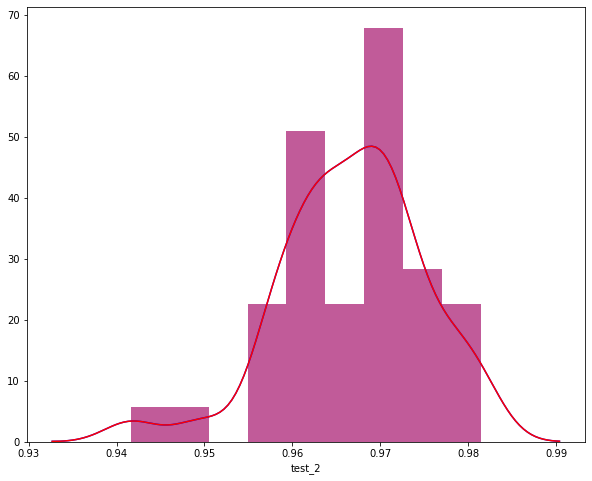

In [19]:
plt.figure(figsize = (10, 8))
sn.distplot(R2.iloc[:num, 1], color='blue')
f = sn.distplot(R2.iloc[:num, 3], color='red');
f = f.get_figure()
f.savefig('7.1.png')

# Homework 3 Explanation
Above, I implemented the methods of cross-validation and bootstraps to the drug data set, more specifically,  As we can see, both methods produced a seemingly good mean of about 97%. However, though this error is technically very small, this does not mean the method of logistic regression works well for this data set. As we saw in the last homework, only about 3% of the points in this data set were classified as cocaine users. So, using this logistic regression, all data would be classified as a non-user, but the error would still seem low. So, cross validation and bootstrapping has only confirmed that with these specific features, Logistic regression is likely not the best fit for this data set.